Timbre: the character or quality of a musical sound or voice as distinct from its pitch and intensity.
 - what is making the sound? Instruments
 - How is the instrument being player? Plyaing Techniques
 - How are different instruments being combined? Ensambles

# Import Required Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import seaborn as sns

# Import and Exam Dataset

In [2]:
# Create columns

timbre_atts= ["T"+str(i) for i in range(1, 91)]
colnames = ["Year"] + timbre_atts

print(colnames)

['Year', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T37', 'T38', 'T39', 'T40', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T48', 'T49', 'T50', 'T51', 'T52', 'T53', 'T54', 'T55', 'T56', 'T57', 'T58', 'T59', 'T60', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T67', 'T68', 'T69', 'T70', 'T71', 'T72', 'T73', 'T74', 'T75', 'T76', 'T77', 'T78', 'T79', 'T80', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86', 'T87', 'T88', 'T89', 'T90']


In [3]:
# Load data set and create dataframe

file_name = "YearPredictionMSD.txt"
df_raw = pd.read_csv(file_name, names= colnames)

df_atts = df_raw[timbre_atts]

In [4]:
df_raw.shape

(515345, 91)

In [5]:
df_raw.describe()

,Year,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
Year    515345 non-null int64
T1      515345 non-null float64
T2      515345 non-null float64
T3      515345 non-null float64
T4      515345 non-null float64
T5      515345 non-null float64
T6      515345 non-null float64
T7      515345 non-null float64
T8      515345 non-null float64
T9      515345 non-null float64
T10     515345 non-null float64
T11     515345 non-null float64
T12     515345 non-null float64
T13     515345 non-null float64
T14     515345 non-null float64
T15     515345 non-null float64
T16     515345 non-null float64
T17     515345 non-null float64
T18     515345 non-null float64
T19     515345 non-null float64
T20     515345 non-null float64
T21     515345 non-null float64
T22     515345 non-null float64
T23     515345 non-null float64
T24     515345 non-null float64
T25     515345 non-null float64
T26     515345 non-null float64
T27     515345 non-null flo

### Data visualization

In [7]:
# Check number of columns
print(df_raw.shape[1])      

91


In [8]:
# count number of songs for each year

year_cnt = df_raw['Year'].value_counts().to_dict()
# for year, cnt in year_cnt.items():
#     print(f"{year} : {cnt}")

year_max = df_raw['Year'].max()
year_min = df_raw['Year'].min()
year_range = year_max - year_min + 1
print(f"{year_max} - {year_min} = {year_range}")

2011 - 1922 = 90


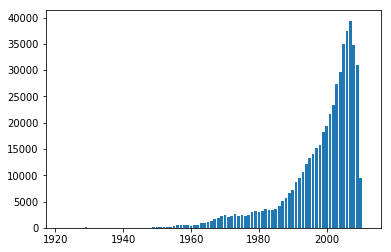

In [9]:
# Plot Bar graph

year_cnt_lst = sorted(year_cnt.items()) 
# print(year_cnt_lst)
x, y = zip(*year_cnt_lst) 

plt.bar(x, y, align='center')
plt.show()

## set original plot for comparison later

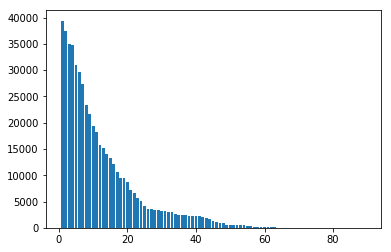

In [10]:
sorted_year_cnt_tuples = sorted(year_cnt.items(), key=lambda item: item[1], reverse = True)
sorted_x, sorted_y = zip(*sorted_year_cnt_tuples) 

plt.bar([*range(1,90)], sorted_y)
plt.show()

## Principal Component Analysis

### Correlation Matrix (or Covariance matrix of Standardized Data)

In [11]:
# all data are numerical, so just take them all 
df = df_atts.iloc[:,:]

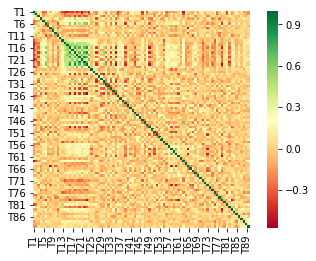

In [12]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [13]:
""" 
“Covariance” indicates the direction of the linear relationship between variables. 
“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables
"""

df_corr = df.corr()
df_corr

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90
T1,1.000000,0.561747,0.245415,0.022270,-0.283635,-0.267820,0.170659,-0.057822,0.218736,0.103704,...,-0.359808,0.190359,-0.137876,0.030790,0.130742,-0.025499,0.048367,-0.145238,-0.105449,-0.183504
T2,0.561747,1.000000,0.018479,0.126845,-0.184864,-0.112388,0.115468,0.108088,0.126086,0.371357,...,-0.289733,0.053480,-0.151313,0.022337,0.150309,0.048165,-0.004499,-0.015567,-0.121116,-0.159893
T3,0.245415,0.018479,1.000000,0.152488,-0.131741,0.040808,-0.057642,0.080881,0.043885,-0.089869,...,0.070644,0.172473,0.109202,-0.007989,-0.033774,-0.093817,0.078392,-0.060559,-0.099712,0.094694
T4,0.022270,0.126845,0.152488,1.000000,0.034988,0.321159,0.282162,0.031649,-0.037905,0.165343,...,-0.018894,-0.090732,0.043403,0.058974,-0.067529,0.041973,0.031072,0.248128,0.034055,0.011724
T5,-0.283635,-0.184864,-0.131741,0.034988,1.000000,0.015561,-0.103110,-0.013265,-0.217551,-0.104766,...,0.038511,-0.088296,0.034104,-0.010014,0.007378,0.004524,-0.006359,-0.016779,0.006124,0.031739
T6,-0.267820,-0.112388,0.040808,0.321159,0.015561,1.000000,-0.250224,0.018108,-0.039627,-0.036528,...,0.103815,-0.207424,0.275158,0.137427,-0.038304,0.211509,-0.038859,0.146493,-0.018272,0.021728
T7,0.170659,0.115468,-0.057642,0.282162,-0.103110,-0.250224,1.000000,0.166334,-0.104158,0.006888,...,-0.098223,0.081376,-0.078279,0.013860,-0.016503,-0.017750,0.016209,0.068457,0.079342,-0.064874
T8,-0.057822,0.108088,0.080881,0.031649,-0.013265,0.018108,0.166334,1.000000,-0.180719,0.415162,...,0.043261,-0.050942,0.084917,0.022558,-0.071064,-0.028124,0.013734,0.047882,0.000330,0.041031
T9,0.218736,0.126086,0.043885,-0.037905,-0.217551,-0.039627,-0.104158,-0.180719,1.000000,0.342296,...,-0.036154,0.044050,-0.035335,0.022276,0.021918,0.012582,0.060279,-0.010335,-0.007362,0.033306
T10,0.103704,0.371357,-0.089869,0.165343,-0.104766,-0.036528,0.006888,0.415162,0.342296,1.000000,...,-0.055571,-0.035898,-0.034574,0.050630,0.046847,0.033973,0.021224,0.040876,-0.031074,-0.011807


In [14]:
w_, v_ = np.linalg.eig(df_corr)

# print(f"Eigenvalues: \n{w_}")
# print(f"Eigenvectors: \n{v_}")

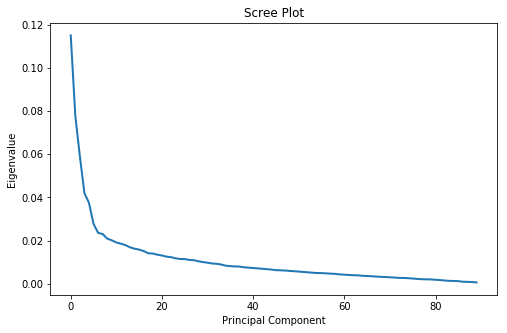

In [15]:
#Determing the number of principal components
"""
To deal with a not-so-ideal scree plot curve, there are a couple ways:
    Kaiser rule: pick PCs with eigenvalues of at least 1.
    Proportion of variance plot: the selected PCs should be able to describe at least 80% of the variance.
""" 

unsorted_PVE_ = w_/w_.sum()
PVE_ = sorted(unsorted_PVE_, reverse = True)
# print("PVE_ : \n", PVE_)
# print("np.cumsum(PVE_)")
np.cumsum(PVE_)

fig = plt.figure(figsize=(8,5))

plt.plot(PVE_, linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [16]:
eigenval_sum = w_.sum()
eigenval_1 = w_[0].sum()
eigenvals_2 = w_[:10].sum()
eigenvals_3 = w_[:20].sum()
eigenvals_4 = w_[:30].sum()
eigenvals_5 = w_[:40].sum()
eigenvals_6 = w_[:50].sum()
eigenvals_7 = w_[:60].sum()
eigenvals_8 = w_[:70].sum()
eigenvals_9 = w_[:80].sum()
eigenvals_10 = w_[:91].sum()


print(f"first  1 eigenvalue : {np.round(100*eigenval_1/eigenval_sum, 2)}%")
print(f"first 10 eigenvalues: {np.round(100*eigenvals_2/eigenval_sum, 2)}%")
print(f"first 20 eigenvalues: {np.round(100*eigenvals_3/eigenval_sum, 2)}%")
print(f"first 30 eigenvalues: {np.round(100*eigenvals_4/eigenval_sum, 2)}%")
print(f"first 40 eigenvalues: {np.round(100*eigenvals_5/eigenval_sum, 2)}%")
print(f"first 50 eigenvalues: {np.round(100*eigenvals_6/eigenval_sum, 2)}%")
print(f"first 60 eigenvalues: {np.round(100*eigenvals_7/eigenval_sum, 2)}%")
print(f"first 70 eigenvalues: {np.round(100*eigenvals_8/eigenval_sum, 2)}%")
print(f"first 80 eigenvalues: {np.round(100*eigenvals_9/eigenval_sum, 2)}%")
print(f"all   90 eigenvalues: {np.round(100*eigenvals_10/eigenval_sum, 2)}%")

first  1 eigenvalue : 11.5%
first 10 eigenvalues: 44.71%
first 20 eigenvalues: 60.86%
first 30 eigenvalues: 72.41%
first 40 eigenvalues: 78.16%
first 50 eigenvalues: 83.29%
first 60 eigenvalues: 87.19%
first 70 eigenvalues: 91.56%
first 80 eigenvalues: 95.57%
all   90 eigenvalues: 100.0%


## Choose attributes based on PCA result above

In [17]:
# map df column names to values
pca_i_dict = dict()
for (i, v), tim_i in zip(enumerate(unsorted_PVE_, start=1), timbre_atts):
    pca_i_dict[tim_i] = v 

#sort dictionary based on values
sorted_tuples = sorted(pca_i_dict.items(), key=lambda item: item[1], reverse = True)
sorted_pca_i_dict = {k: v for k, v in sorted_tuples}
sorted_pca_i_keys = [i for i in sorted_pca_i_dict.keys()]
print(f"Orders of components based on PCA:\n {sorted_pca_i_keys}")

Orders of components based on PCA:
 ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T19', 'T18', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T34', 'T33', 'T32', 'T39', 'T40', 'T41', 'T42', 'T44', 'T45', 'T49', 'T50', 'T52', 'T54', 'T57', 'T60', 'T61', 'T62', 'T64', 'T66', 'T67', 'T90', 'T71', 'T87', 'T83', 'T84', 'T78', 'T86', 'T81', 'T77', 'T85', 'T79', 'T89', 'T80', 'T76', 'T75', 'T74', 'T73', 'T82', 'T72', 'T70', 'T69', 'T88', 'T68', 'T65', 'T63', 'T59', 'T58', 'T56', 'T55', 'T53', 'T51', 'T48', 'T47', 'T46', 'T43', 'T37', 'T38', 'T36', 'T35']


In [18]:
# choose numbers of attributes (columns)

cols_range = 20
cols_lst_atts = sorted_pca_i_keys[:cols_range]
cols_lst = ["Year"] + cols_lst_atts
print(cols_lst)

['Year', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T19', 'T18', 'T20']


In [19]:
# Update df with selected cloumns
df_sel_pre = df_raw[cols_lst]

   Year        T1        T2        T3        T4        T5        T6        T7  \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         T8        T9  ...      T11      T12       T13         T14  \
0 -12.23257   7.83089  ...  3.32136 -2.31521  10.20556   611.10913   
1  -0.92019  18.76548  ...  2.21920  0.34006  44.38997  2056.93836   
2  -2.35035  16.07017  ...  2.73553  0.82804   7.46586   699.54544   
3 -10.34124   3.55005  ...  6.63016 -3.35142  37.64085  2174.08189   
4  -9.37636  12.63699  ...  1.60923  2.19223  47.32082   894.28471   

          T15        T16        T17        T19        T18        T20  
0   951.08960  698.11

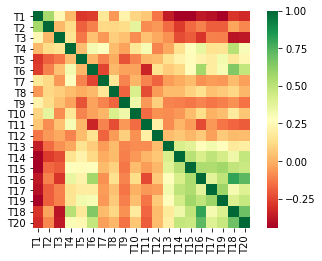

In [20]:
# scatter plot 
# scatter_matrix(df_sel, alpha=1, figsize=(40, 40), diagonal='kde', marker="o")
print(df_sel_pre.head())
sns.heatmap(df_sel_pre [cols_lst_atts].corr(), square=True, cmap='RdYlGn')

In [24]:
df_sel = pd.DataFrame(whiten(df_sel_pre[cols_lst_atts]))

In [35]:
print(df_sel.head())

         0         1         2         3         4         5         6   \
0  8.231255  0.416266  2.072030  0.535976 -0.761404 -1.018768 -1.716460   
1  8.031599  0.357293  1.994037  0.793147 -0.451620 -1.931737  0.601591   
2  8.398302  0.617601  1.582671  0.821976 -0.287785 -1.442664 -0.225004   
3  7.951724 -0.036804  1.029181  0.158537  0.042505 -2.038992  0.346625   
4  8.400455  0.818335  1.902535  0.518779 -0.693450 -1.307702 -0.856587   

         7         8         9         10        11        12        13  \
0 -1.536018  0.739960 -0.377909  0.759890 -0.278264  0.458479  0.349332   
1 -0.115546  1.773197  0.703207  0.507728  0.040872  1.994193  1.175819   
2 -0.295128  1.518511  0.213650  0.625859  0.099522  0.335399  0.399885   
3 -1.298528  0.335453 -0.974398  1.516906 -0.402806  1.690993  1.242783   
4 -1.177370  1.194101  0.143347  0.368174  0.263483  2.125860  0.511205   

         14        15        16        17        18        19  
0  0.753945  0.638813  0.859740  1

## k-means

In [26]:
# Generate cluster cneters
cluster_centers, distortion = kmeans(df_sel, year_range)

# assign clusters
df_sel['cluster_labels_kmeans'], distortion_list = vq(df_sel, cluster_centers)

In [28]:
# count number of songs for each year

year_cnt2 = df_sel['cluster_labels_kmeans'].value_counts().to_dict()
for (year, cnt), (labels, cnt2) in zip(year_cnt.items(), year_cnt2.items()):
    print(f"{year} : {cnt}; {labels} : {cnt2}")

year_range2 = df_sel['cluster_labels_kmeans'].max() - df_sel['cluster_labels_kmeans'].min() + 1
print(year_range2)

2007 : 39404; 70 : 10123
2006 : 37534; 75 : 9917
2005 : 34952; 76 : 9523
2008 : 34760; 19 : 8889
2009 : 31038; 21 : 8777
2004 : 29607; 41 : 8547
2003 : 27382; 86 : 8488
2002 : 23451; 78 : 8444
2001 : 21590; 27 : 8203
2000 : 19285; 49 : 8148
1999 : 18238; 4 : 8124
1998 : 15814; 81 : 7937
1997 : 15182; 3 : 7754
1996 : 14130; 61 : 7685
1995 : 13257; 1 : 7677
1994 : 12121; 6 : 7666
1993 : 10525; 23 : 7480
1992 : 9543; 36 : 7462
2010 : 9396; 84 : 7437
1991 : 8647; 13 : 7404
1990 : 7256; 79 : 7303
1989 : 6670; 28 : 7219
1988 : 5611; 5 : 7133
1987 : 5122; 12 : 7118
1986 : 4219; 58 : 6953
1982 : 3597; 66 : 6869
1985 : 3578; 10 : 6820
1983 : 3386; 31 : 6762
1984 : 3368; 42 : 6759
1981 : 3162; 33 : 6759
1979 : 3108; 65 : 6685
1980 : 3101; 0 : 6550
1978 : 2926; 39 : 6483
1973 : 2596; 87 : 6471
1977 : 2502; 16 : 6424
1975 : 2482; 50 : 6329
1970 : 2349; 37 : 6324
1972 : 2288; 24 : 6264
1969 : 2210; 57 : 6186
1974 : 2184; 77 : 6142
1976 : 2179; 14 : 6133
1971 : 2131; 9 : 6065
1968 : 1867; 32 : 5759


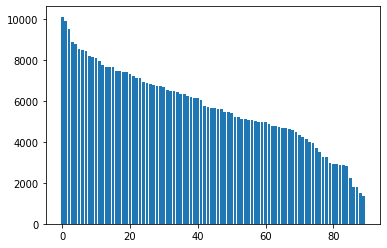

In [33]:
# Plot Bar graph
sorted_year_cnt_tuples2 = sorted(year_cnt2.items(), key=lambda item: item[1], reverse = True)
sorted_x2, sorted_y2 = zip(*sorted_year_cnt_tuples2) 

plt.bar([*range(0,90)], sorted_y2)
plt.show()

Elbow Method

In [ ]:
distortions = []

clusters_num_lst = range(20, 100, 10)

for i in clusters_num_lst:
    cluster_centers, distortion = kmeans(df_sel[cols_lst_atts], i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'clusters': clusters_num_lst, 
                            'distortions': distortions})
  


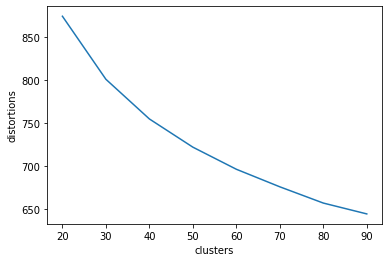

In [ ]:
# create plots
sns.lineplot(x='clusters', y='distortions', data=elbow_plot)
plt.xticks(clusters_num_lst)
plt.show()

# Supervised Learning

In [43]:
X_temp = df_sel_pre.iloc[:,1:].to_numpy()  # selected columns of attributes
X = preprocessing.normalize(X_temp, norm='l2', axis=1)
Y_temp = df_sel_pre.iloc[:,0].to_numpy()
Y = np_utils.to_categorical(minmax_scale(Y_temp, feature_range=(0,year_range-1)))

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [44]:
X_train = X[0:463715]
X_test = X[463715:]

Y_train = Y[0:463715]
Y_test = Y[463715:]

# Keras Model 1

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min')

In [112]:
model1 = Sequential()

# input layer
model1.add(Dense(90,  input_shape=(cols_range,)))
model1.add(Dropout(0.2))
# 2nd layer
model1.add(Dense(90, activation='relu'))
model1.add(Dropout(0.2))
# output layer
model1.add(Dense(90, activation='sigmoid'))

#compile the model
# model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(f"Loss Function: {model1.loss}")

Loss Function: binary_crossentropy


In [113]:
# fit the model
model1_train = model1.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks=[early_stop], verbose=False)

In [114]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 90)                1890      
_________________________________________________________________
dropout_39 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 90)                8190      
_________________________________________________________________
dropout_40 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 90)                8190      
Total params: 18,270
Trainable params: 18,270
Non-trainable params: 0
_________________________________________________________________


In [115]:
model1.metrics_names

['loss', 'acc']

In [116]:
score = model1.evaluate(X_train, Y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

score = model1.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train loss: 0.04773497296765527
Train accuracy: 0.988889075395634
Test loss: 0.04778040815364846
Test accuracy: 0.9888879989113846


In [117]:
model1.save("./models/model1_file.h5")

# model1_load = load_model("model1_file.h5")
# predictions1 = load_model1.predict(data_to_predict_with)
# probability_true = predictions1[:,1]

# Keras Model 2

In [118]:
model2 = Sequential()

# input layer
model2.add(Dense(90, activation='relu', input_shape=(cols_range,)))
model2.add(Dropout(0.25))
# 2nd layer
model2.add(Dense(180, activation='relu'))
model2.add(Dropout(0.25))
# 3rd layer
model2.add(Dense(180, activation='relu'))
model2.add(Dropout(0.25))
# output layer
model2.add(Dense(90, activation='softmax'))

#compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(f"Loss Function: {model2.loss}")

Loss Function: binary_crossentropy


In [119]:
# fit the model
model2_train = model2.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks=[early_stop], verbose=False)

In [120]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 90)                1890      
_________________________________________________________________
dropout_41 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 180)               16380     
_________________________________________________________________
dropout_42 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 180)               32580     
_________________________________________________________________
dropout_43 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 90)                16290     
Total para

In [121]:
model2.metrics_names

['loss', 'acc']

In [122]:
score = model2.evaluate(X_train, Y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

score = model2.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train loss: 0.047523687114996355
Train accuracy: 0.9888898900584713
Test loss: 0.04761293910179701
Test accuracy: 0.9888882141022772


In [123]:
model2.save("./models/model2_file.h5")

# model2_load = load_model("model2_file.h5")
# predictions2 = load_model2.predict(data_to_predict_with)
# probability_true = predictions2[:,1]

# Model Comparison Plot

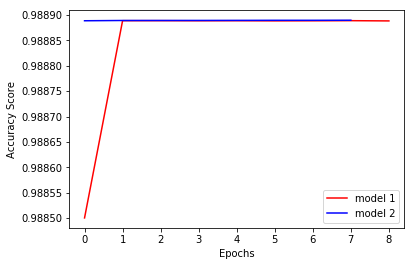

In [129]:
plt.plot(model1_train.history['acc'], 'r', label='model 1')
plt.plot(model2_train.history['acc'], 'b', label='model 2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.show()

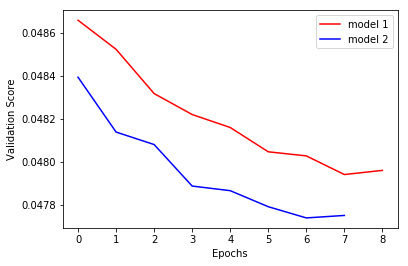

In [130]:
plt.plot(model1_train.history['val_loss'], 'r', label='model 1')
plt.plot(model2_train.history['val_loss'], 'b', label='model 2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
plt.show()